# Tarea 3 - Identificacion de Proteinas


![](https://miro.medium.com/max/700/1*7pJ7RB9UcKH12gGBi3MBEQ.png)<div align="center"><a href="https://www.freepik.com/photos/background"></div>

In [1]:
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xml.etree.ElementTree as ET

## COVID-19: Genetic information

Cargamos el genoma del virus utilizando BioPython

In [2]:
covid19 = SeqIO.read('MN908947.fna', "fasta")

In [3]:
print(f'El genoma del virus que causa el Covid-19 (known as SARS-CoV-2) consiste en {len(covid19)} bases geneticas')

El genoma del virus que causa el Covid-19 (known as SARS-CoV-2) consiste en 29903 bases geneticas


Primeras 100 bases del Covid-19

### BioPython Seq
En BioPython usamos Seq para manejar secuencias ADN.

Investigar como utilizar la funcion count de Seq en BioPython
(https://biopython.org/wiki/Seq)

In [4]:
covid_DNA = covid19.seq
print(covid_DNA[:100])

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTC


In [5]:
## Solo ejecutar, investigar la funcion count de Seq en BioPython
covid_DNA.count("A")

8954

Creamos un diccionario con el conteo de los nucleotidos, ejemplo:
```python
nucleotidos = {'A': 8954, 'T': ..., 'G': ..., 'C': ...}
```

In [6]:
### Tu codigo aqui 
nucleotidos = {
    'A': covid_DNA.count("A"),
    'T': covid_DNA.count("T"), 
    'G': covid_DNA.count("G"),
    'C': covid_DNA.count("C")}
print(nucleotidos)
# Resultado esperado: {'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}

{'A': 8954, 'T': 9594, 'G': 5863, 'C': 5492}


In [7]:
nucleotidos["C"]

5492

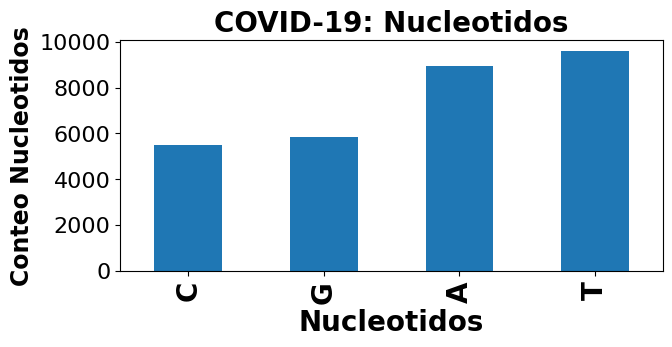

In [8]:
########## Solo Ejecutamos este codigo ##########
nts= pd.DataFrame(data=nucleotidos, index=[0]).T.reset_index()
nts= nts.rename(columns={0: 'conteo', 'index': 'nucleotidos'})
nts=nts.sort_values(by=['conteo'], ascending=True)

plt.figure(figsize=(7,3))
a= nts['conteo'].plot.bar()
plt.ylabel("Conteo Nucleotidos", weight='bold', fontsize=17)
r=list(range(len(nts)))
plt.xticks(r, nts.nucleotidos, weight='bold', fontsize=20)
plt.xlabel("Nucleotidos", weight='bold', size=20)
plt.yticks(fontsize=16)
plt.title("COVID-19: Nucleotidos", weight='bold', size=20)
plt.show()

### Como extraemos informacion de la secuendia de ADN

La expresión génica es el proceso mediante el cual la información codificada en un gen se convierte en una función. Esto ocurre principalmente a través de la transcripción de moléculas de ARN que codifican proteínas o moléculas de ARN no codificantes que cumplen otras funciones.

- TRANSCRIPCIÓN: el ADN se copia en un ARN mensajero (ARNm)
- TRADUCCIÓN: el ARNm se traduce en aminoácidos
- AMINO ACID FOLDING: Una secuencia de 20 o más aminoácidos (los componentes básicos de las proteínas) forman una proteína.

<img src="gene_expression.png">

## Transcripción

Transcripcion con BioPython (http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec24)


<img src="transcipcion.png">

In [9]:
covid_mRNA = covid_DNA.transcribe()

In [10]:
print(covid_mRNA[:100])

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUC


Podemos ver que el ARNm es una copia idéntica con la base T reemplazada por U

In [11]:
print(f'Covid-19 DNA: {covid_DNA[:50]}')
print(f'Covid-19 RNA: {covid_mRNA[:50]}')

Covid-19 DNA: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTC
Covid-19 RNA: AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUC


## TRADUCCIÓN

La traducción es el proceso que toma la información que pasa del ADN como ARN mensajero y la convierte en una serie de **aminoácidos**.

Es esencialmente una traducción de un código **(secuencia de nucleótidos A T C G)** a otro código **(secuencia de aminoácidos)**.

#### ¿Cómo ocurre esta traducción?
En este caso el diccionario de aminoácidos es la siguiente tabla. Los nucleótidos se leen en grupos de tres "AUG GCC CAG UUA...". Cada triplete se llama codón y codifica para un aminoácido específico.


<div>
<img src="GeneticCodonPoster-1.jpg" width="700"/>
</div>

Hay 61 codones para 20 aminoácidos, y cada uno de ellos se "lee" para especificar un determinado aminoácido del 20 que se encuentran comúnmente en las proteínas.
Un codón, AUG, especifica el aminoácido metionina y también actúa como codón de inicio para señalar el inicio de la construcción de la proteína.

Hay tres codones más que no especifican aminoácidos. Estos codones de terminación, UAA, UAG y UGA, le indican a la célula cuando un polipéptido está completo. En conjunto, esta colección de relaciones codón-aminoácido se denomina código genético, porque permite que las células "descodifiquen" un ARNm en una cadena de aminoácidos.

### BioPython Translate (http://biopython.org/DIST/docs/tutorial/Tutorial.html#sec25)
BioPython cuenta con la función `translate()`, BioPython traduce el ARNm a cadenas de aminoácidos. Las cadenas se separan con un * que es el codón de terminación (UAA, UAG y UGA)

In [12]:
covid_aa = covid_mRNA.translate() 

C:\Python311\Lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [13]:
covid_aa

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

Tenemos varias cadenas de un total de 9967 aminoácidos separados con codones de terminación *

Ahora queremos separar estas cadenas y almacenarlas en una lista, para esto podemos utilizar función [split](https://www.w3schools.com/jsref/jsref_split.asp).

La función `split()` del string divide la secuencia en cualquier codón de parada y mantiene separadas las cadenas de aminoácidos. Esto facilita el análisis posterior.

In [14]:
## Ejemplo de split
a = "adf-fdf-fasdfa-fadfa".split('-')
print(a)

['adf', 'fdf', 'fasdfa', 'fadfa']


In [20]:
### tu codigo aqui
proteinas = covid_aa.split('*')

¿Cuantes proteinas encontramos?

In [21]:
total_proteinas =  len(proteinas)
print(f'Tenemos {total_proteinas} cadenas de aminacidos en el genoma del del virus')

Tenemos 775 cadenas de aminacidos en el genoma del del virus


In [22]:
## Imprime las primeras 10 proteinas
## tu codigo aqui
print(proteinas[:11])

[Seq('IKGLYLPR'), Seq('QTNQLSISCRSVL'), Seq('TNFKICVAVTRLHA'), Seq('CTHAV'), Seq('LITNYCR'), Seq('QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER'), Seq('DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS'), Seq('RWHLWLSRS'), Seq('KRRFAST'), Seq('TALCVHQTFGCSNCTSWSCYG'), Seq('AGSRTRRHSVRS')]


Solo las secuencias con más de **20 aminoácidos** codifican proteínas funcionales. 
Las secuencias cortas de aminoácidos son oligopéptidos y tienen otras funcionalidades. Aquí nos centraremos en las cadenas con más de 20 cadenas de aminoácidos: **Proteínas**.



Vamos a utilizar las cadenas de aminoacidos que tengan secuancias de una longitud mayor a 100  (TIP: usar `len`).

Estas cadenas de aminoacidos las vamos a almacenar en una lista llamada `top_proteinas` (TIP: usar `append()` en listas)

Ejemplo de append en listas: (https://www.w3schools.com/python/ref_list_append.asp)

In [23]:
top_proteinas = [] ## Lista vacia

for p in proteinas:
    if len(p) > 100:
        top_proteinas.append(p)
    ## tu codigo aqui:


Solo hay 3 cadenas de aminoacidos con esa longitud

Resultado Esperado:

In [24]:
print(len(top_proteinas))
print(top_proteinas)

3
[Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN'), Seq('ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRATATIPIQA...VPL'), Seq('TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADN...KTE')]



## Búsqueda BLAST.

BLAST (herramienta básica de búsqueda de alineación local) es un algoritmo y programa para comparar información de secuencias biológicas primarias, como las secuencias de aminoácidos de proteínas o los nucleótidos de secuencias de ADN y/o ARN. Una búsqueda BLAST permite a un investigador comparar una proteína o secuencia de nucleótidos en cuestión (llamada consulta) con una biblioteca o base de datos de secuencias e identificar secuencias de biblioteca que se asemejan a la secuencia de consulta por encima de un cierto umbral.

Vamos a utilizar los API de EMBL-EBI (https://www.ebi.ac.uk/Tools/common/tools/help/index.html?tool=psiblast#/).

En el sitio web en el paso 1 debemos seleccionar **PSI-BLAST** (Protein Similarity Search).
Debemos listar, identificar el tipo (GET,POST) y describir los recursos de este API en una celda de markdown.

In [25]:
import requests

In [200]:
### Escribe aqui:

#### Creamos nuestras funciones GET y POST

#### POST

In [30]:
## Definimos una nueva funcion que puede hacer un evento post
def make_post_api_request(server, endpoint, data):
    r = requests.post(
        server+endpoint, 
        data = data
    )
    print(f"Status code: {r.status_code}")
    if not r.ok:
        r.raise_for_status()
        sys.exit()
    
    return r

#### GET

In [31]:
def make_api_request(server, endpoint, params={}):
    r = requests.get(
        server+endpoint, 
        headers={ "Content-Type" : "application/json"},
        params = params
    )
    print(f"Status code: {r.status_code}")
    if not r.ok:
        r.raise_for_status()
        sys.exit()
    
    return r

### Enviando Datos al API

Vamos a utilizar el recurso `Submit job` este es un POST entonces debemos enviar un diccionario con los datos

In [33]:
server = "https://www.ebi.ac.uk"
endpoint = f"/Tools/services/rest/psiblast/run"

El diccionario `data` contiene los datos que vamos a enviar al API.

Completa el diccionario, el parametro **sequence** puede ser cualquier proteina de la lista `top_proteinas`, recordemos que es un objeto tipo *Seq* por lo que lo tenemos que converir a String utilizando `str()`

Recordar agergar la `,` entre cada elemento del diccionario!!!

In [35]:
### data contiene los datos que vamos a enviar al API
### Completa el diccionario
data = {
    "email": 'ewdiazsa@gmail.com', #"mel.marroquin@gmail.com",## Completa aqui
    "sequence" : str(top_proteinas[0]),
    "database": "uniprotkb"
}

In [28]:
data

{'email': 'mel.marroquin@gmail.com',
 'sequence': 'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACI

In [52]:
print(data)

{'email': 'ewdiazsa@gmail.com', 'sequence': 'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLC

In [36]:
response = make_post_api_request(server,endpoint, data)

ConnectTimeout: HTTPSConnectionPool(host='www.ebi.ac.uk', port=443): Max retries exceeded with url: /Tools/services/rest/psiblast/run (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000002788EC6B5D0>, 'Connection to www.ebi.ac.uk timed out. (connect timeout=None)'))

Si el **Status code** es 200 quiere decir que logramos enviamos de forma exitosa la data y se esta procesando la data. 
Miremos cual es el `Job_id` en el response

In [54]:
## solo ejecutar
job_id = response.content.decode()
print(job_id)

psiblast-R20230318-132928-0302-77121117-p2m


#### Job Status

Ahora hay que consultar el estado del job y esperar a que este finalizado. Cuando el job esta completo el recurso o endpoint nos retorna `FINISHED`

In [55]:
server = "https://www.ebi.ac.uk"
busqueda = job_id ## Tu codigo aqui
endpoint = f"/Tools/services/rest/psiblast/status/{busqueda}?"

In [58]:
## Solo Ejecutar
job_status = make_api_request(server, endpoint)
print("ESTADO: "+job_status.content.decode())

Status code: 200
ESTADO: RUNNING


#### Visualisar los resultados
Para visualizar los resultados podemos ir al [Job Dispatcher](https://wwwdev.ebi.ac.uk/Tools/jdispatcher) e introducir el Job Id

#### Obtenerlos resultados por medio el API

#### Paso 1:
Vamos hacer una llamada a un endpoint para ver que tipos de resultados podemos obtener
- Endpoint: `/Tools/services/rest/psiblast/resulttypes/`
    - Parametros: 
        - jobId: id del job

#### Paso 2: 
Hacemos una nueva llamda a otro endpoint para descargar los resultados
- Endpoint: `/Tools/services/rest/psiblast/result/`
    - Parametros: 
        - jobId: id del job
        - resultType: Tipo de resultado

#### Paso 1

In [41]:
server = "https://www.ebi.ac.uk"
busqueda = job_id
endpoint = f"/Tools/services/rest/psiblast/resulttypes/{busqueda}"

In [42]:
tipos_resultado = make_api_request(server, endpoint)

Status code: 200


In [43]:
## Nos retorna un XML
tipos_resultado.content

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><types><type><description>The output as returned by our wrapper</description><fileSuffix>txt</fileSuffix><identifier>wrapper_out</identifier><label>Wrapper Output</label><mediaType>text/plain</mediaType></type><type><description>The output from the tool itself</description><fileSuffix>txt</fileSuffix><identifier>out</identifier><label>Tool Output</label><mediaType>text/plain</mediaType></type><type><description>JSON output from the jdispatcher-parsers CLI application</description><fileSuffix>json</fileSuffix><identifier>json</identifier><label>Output from the Python Parsers CLI application</label><mediaType>application/json</mediaType></type><type><description>XML output from the jdispatcher-parsers CLI application</description><fileSuffix>xml</fileSuffix><identifier>xml</identifier><label>Output from the Python Parsers CLI application</label><mediaType>application/xml</mediaType></type><type><description>Error messages produced 

#### Buscando Tipos de resultado que retornen texto
Vamos a enforcarnos en los resultados de tipo texto, para esto vamos a converitr el XML a un diccionario y vamos a buscar solo los que resultados que retornen texto.

In [44]:
# Solo ejecutar
import xmltodict

In [45]:
# Solo ejecutar
tipos_resultado_dic = xmltodict.parse(tipos_resultado.content)
for r in tipos_resultado_dic["types"]["type"]:
    if r.get("fileSuffix", "") == "txt":
        print(f"== Label: {r['label']} ==")
        print(f"- Identificador: {r['identifier']}")
        print(f"- Descripcion:   {r['description']}")

== Label: Wrapper Output ==
- Identificador: wrapper_out
- Descripcion:   The output as returned by our wrapper
== Label: Tool Output ==
- Identificador: out
- Descripcion:   The output from the tool itself
== Label: Wrapper Error Details ==
- Identificador: wrapper_error
- Descripcion:   Error messages produced by the wrapper
== Label: Input Sequence ==
- Identificador: sequence
- Descripcion:   Your input sequence as seen by the tool


#### Paso 2
En los resultados anteriores vimos algunos tipos de resultado y su descripción.
A continuacion, debemos utilizar un identificador como parametro para una nueva llamda al API.
este identificador lo declaramos en la variable `tipo_resultado`

In [181]:
server = "https://www.ebi.ac.uk"
busqueda =  ## Tu codigo aqui
tipo_resultado = ## Tu codigo aqui
endpoint = f"/Tools/services/rest/psiblast/result/{job_id}/{tipo_resultado}"

In [182]:
resultado = make_api_request(server, endpoint)

Status code: 200


In [183]:
resultado.content.decode()

'>lcl|TR:A0A8B1KIC0 A0A8B1KIC0_SARS2 Accessory protein 7a (Fragment) OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=ORF7a PE=4 SV=1\nMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHVYQLRAR\nSVSPKLFIRQEEVQELYSPIFLIVAAIVFITLCFTLKRKTE\n>lcl|TR:A0A6V7AKU4 A0A6V7AKU4_SARS2 Accessory protein 7a (Fragment) OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=ORF7a PE=4 SV=1\nMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHVYQLRAR\nSVSPKLFIRQEEVQELYSPIFLIVAAIVFITLCFTLKRKTE\n>lcl|TR:A0A6V7APJ2 A0A6V7APJ2_SARS2 Accessory protein 7a (Fragment) OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=ORF7a PE=4 SV=1\nMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNSPFHPLADNKFALTCFSTQFAFACPDGVKHVYQLRAR\nSVSPKLFIRQEEVQELYSPIFLIVAAIVFITLCFTLKRKTE\n>lcl|TR:A0A6B9VSS2 A0A6B9VSS2_SARS2 Accessory protein 7a OS=Severe acute respiratory syndrome coronavirus 2 OX=2697049 GN=orf7a PE=4 SV=1\nMKIILFLALITLATCELYHYQECVRGTTVLLKEPC